<a href="https://colab.research.google.com/github/cameronliddle/Algorithms/blob/main/AirQualityAppliedPredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Bejing/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Bejing/data.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
df.drop('No', axis=1, inplace=True)

train, test = df[~df['pm2.5'].isnull()], df[df['pm2.5'].isnull()]

train.shape, test.shape

((41757, 12), (2067, 12))

In [21]:
train.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [22]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


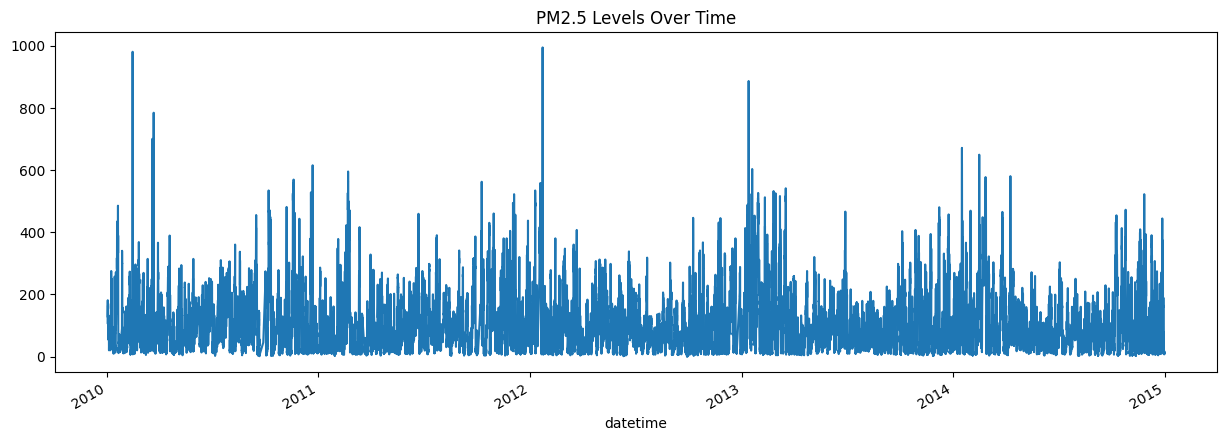

In [24]:
# First, create the 'datetime' column by combining the year, month, day, and hour columns
train['datetime'] = pd.to_datetime(train[['year', 'month', 'day', 'hour']])

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Now, set the 'datetime' column as the index and plot the 'pm2.5' levels
train.set_index('datetime')['pm2.5'].plot(figsize=(15, 5), title='PM2.5 Levels Over Time')
plt.show()


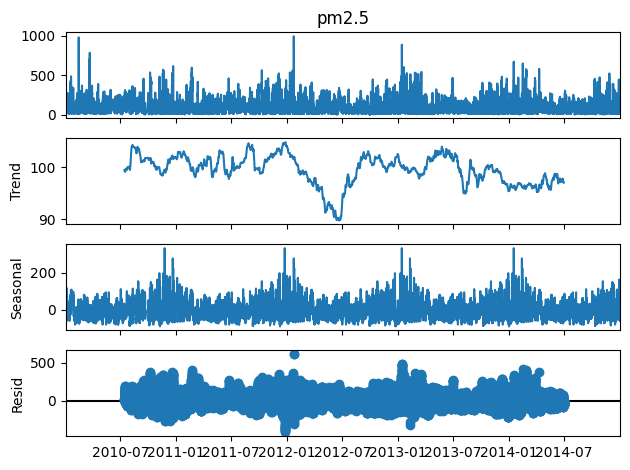

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train.set_index('datetime')['pm2.5'], model='additive', period=24*365)
decomposition.plot()
plt.show()


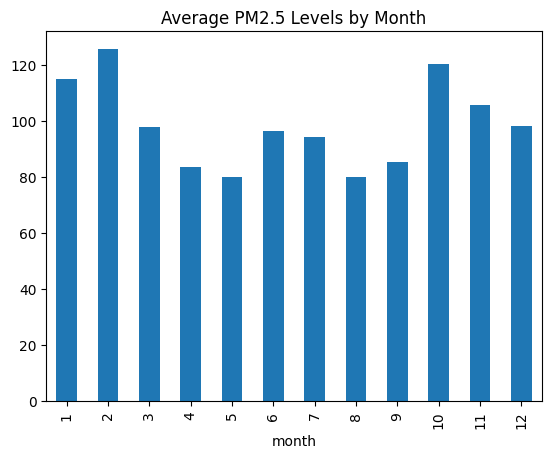

In [26]:
train['month'] = train['datetime'].dt.month
monthly_avg = train.groupby('month')['pm2.5'].mean()
monthly_avg.plot(kind='bar', title='Average PM2.5 Levels by Month')
plt.show()


In [27]:
train[['pm2.5', 'TEMP', 'Iws', 'PRES']].corr()


,pm2.5,TEMP,Iws,PRES
pm2.5,1.000000,-0.090534,-0.247784,-0.047282
TEMP,-0.090534,1.000000,-0.149613,-0.826903
Iws,-0.247784,-0.149613,1.000000,0.178871
PRES,-0.047282,-0.826903,0.178871,1.000000


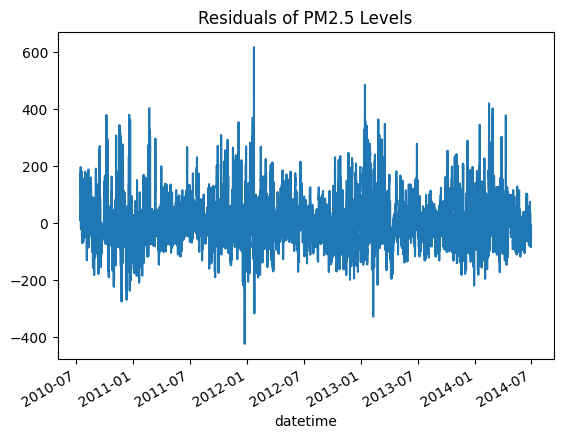

In [28]:
residuals = decomposition.resid
residuals.plot(title='Residuals of PM2.5 Levels')
plt.show()


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['pm2.5'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast = results.get_forecast(steps=30)
forecast_ci = forecast.conf_int()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

<ipython-input-30-0885a7a4179f>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(train['datetime'].iloc[-1], periods=30, freq='H')


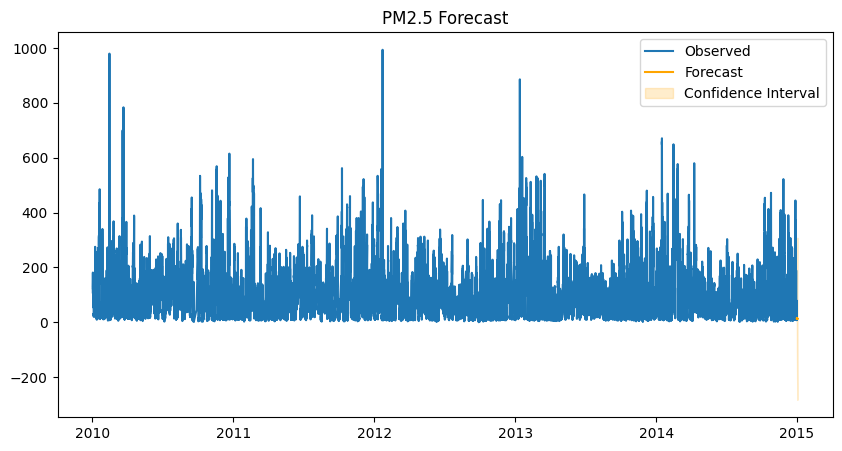

In [30]:
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(train['datetime'], train['pm2.5'], label='Observed')
forecast_index = pd.date_range(train['datetime'].iloc[-1], periods=30, freq='H')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.title('PM2.5 Forecast')
plt.show()


In [31]:
train.set_index('datetime', inplace=True)


In [32]:
exog = train[['TEMP', 'Iws', 'PRES']]
model = SARIMAX(train['pm2.5'], exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
train.index = pd.date_range(start=train.index[0], periods=len(train), freq='H')


<ipython-input-33-5f8f9bd8f897>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train.index = pd.date_range(start=train.index[0], periods=len(train), freq='H')


In [34]:
exog = train[['TEMP', 'Iws', 'PRES']]
model = SARIMAX(train['pm2.5'], exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


In [36]:
train_data = train['pm2.5'][:-30]  # Use all except the last 30 data points
validation_data = train['pm2.5'][-30:]  # Use the last 30 data points as validation set

# Fit the SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the validation period
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean

# Calculate accuracy metrics for validation
mae = mean_absolute_error(validation_data, forecast_values)
rmse = np.sqrt(mean_squared_error(validation_data, forecast_values))
print(f"Validation MAE: {mae}")
print(f"Validation RMSE: {rmse}")


Validation MAE: 49.002349510558716
Validation RMSE: 49.75432937756259


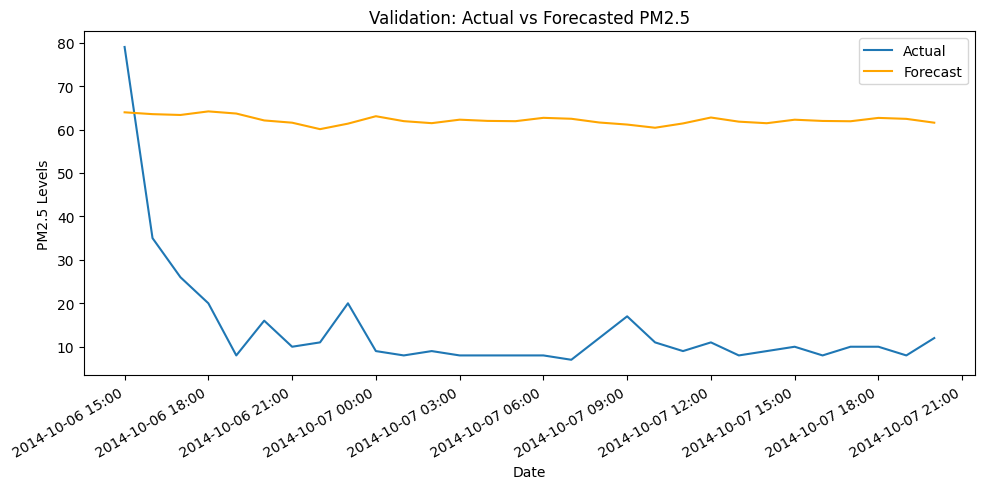

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(validation_data.index, validation_data, label='Actual')
plt.plot(validation_data.index, forecast_values, label='Forecast', color='orange')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format: Year-Month-Day Hour:Minute
plt.gcf().autofmt_xdate()  # Automatically rotate the x-axis labels for better readability

# Add labels and title
plt.legend()
plt.title('Validation: Actual vs Forecasted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.tight_layout()

# Show the plot
plt.show()


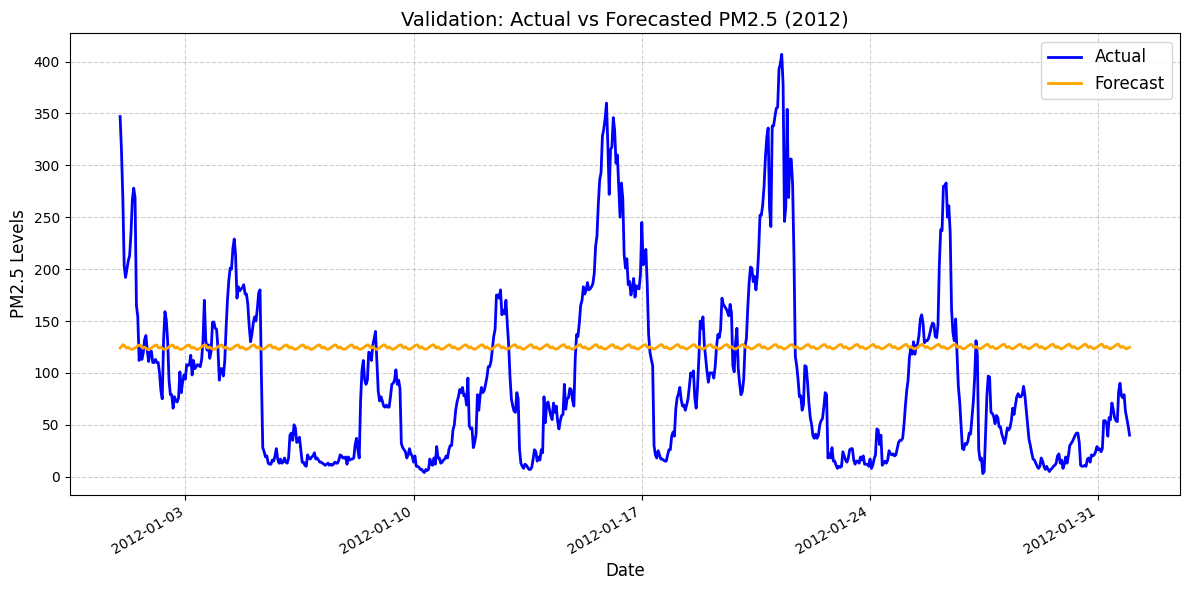

Validation MAE (2012): 75.88269056744907
Validation RMSE (2012): 89.51151977246566


In [45]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Plot the new validation with improved date formatting
plt.figure(figsize=(12, 6))
plt.plot(validation_data.index, validation_data, label='Actual', linewidth=2, color='blue')
plt.plot(validation_data.index, forecast_values, label='Forecast', linewidth=2, color='orange')

# Format x-axis dates
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Place major ticks weekly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as Year-Month-Day
plt.gcf().autofmt_xdate()  # Auto-rotate date labels

# Add grid, legend, and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Validation: Actual vs Forecasted PM2.5 (2012)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Levels', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Print accuracy metrics again for reference
print(f"Validation MAE (2012): {mae}")
print(f"Validation RMSE (2012): {rmse}")
